# GRAD-PROJECT
---

# INDIAN PREMIER LEAGUE TEAM ANALYSIS 

---

Shreejaa Talla<br>
stalla@student.gsu.edu<br>
Department of computer science<br>
Georgia State University<br>

---
### Index
1. [Introduction](#intro)
2. [Install and Import required libraries](#import)
3. [Data](#data)
4. [Data Cleaning](#dc)
    1. [All matches summary](#matchs_c)
    2. [All batting summary](#batting_c)
    3. [All bowling summary](#bowling_c)
5. [Describing new designs](#nd)
    1. [Custom scatter plot](#csp)
    2.[hierarchy networkx graph](#hng)
6. [Data visualizations](#dv)
7. [Dashboard of IPL team analysis](#dash)
    1. [Basic method](#dash1)
    2. [Using HTML elements](#dash2)
    3. [Running on localhost](#dash3)
    4. [Save as .html file](#dash4)
8. [Tools used](#tools)
9. [Challenges](#ch)
10. [References](#r)

<a id="intro"></a>
## Introduction: 
- Every year starting from 2008, India has been conducting the Indian Premier League(IPL), where it picks up all the players from different countries and selects about fifteen players per team. There are about 12 active teams in the IPL which are Chennai Super Kings(CSK), Sunrisers Hyderabad(SRH), Delhi Champions(DC), Royal Challenges Bangalore(RCB), Kochi Tuskers(Kochi), Kings XI Punjab(KXIP), Kolkata Knight Riders(KKR), Gujarat Lions(GL), Rajasthan Royals(RR), Rising Pune Supergiant(RPS), Mumbai Indians(MI) and Sahara Pune Warriors(PWI).
- Before the matches begin, Main Cricket Tournament leaders work on analyzing teams, and based on that; they pick up players for each group. Thus, every year few players keep shuffling.
- The cricket ambassadors examine each team based on the data formed by all the previous matches. Depicting different visualization based on the data analysis on each IPL team in two categories: batting and bowling can solve this problem by analyzing data to find the best players and matches played by each team.
- This analysis are prepared using **panel** for creating a dashboard and plots are designed using **matplotlib and seaborn**. Two custom designs are build on top of scatter plot and networkx graph.

## Compilation of this project

1. Please run each and every cell step by step.
2. The end result is displayed in the dashboard type1 and dashboard type2, once the cell is run and the dashboard is generated inline, the interactive component of those dashboards can be used to test the interactivity. The dash might take 1-2 mins to load the data based on dropdown values.
3. .HTML and .pdf results are given in the folder obtained by dashboard type3 which are not interactive as they dont have a conection to server.

<a id="import"></a>
## Install and Import required libraries

Install the following libraries in conda command prompt on windows:
1. conda install -c conda-forge panel
2. conda install -c conda-forge pydot
3. conda install -c conda-forge networkx 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.animation import FuncAnimation
import panel as pn
import panel.widgets as widget
import random
import warnings

warnings.filterwarnings('ignore')

<a id="data"></a>
## Data

### Matches Data 

This data consists of 45 columns and 824 rows, it describes about each indian premiere league matches, year in which it is conducted, test score of two teams, venue of the match, match description, toss decision, innings, umpire details and winning team details.

In [2]:
matches = pd.read_csv("data/all_season_summary.csv")
matches

season       id                                               name  \
0      2020  1216492               Mumbai Indians v Chennai Super Kings   
1      2020  1216493                   Delhi Capitals v Kings XI Punjab   
2      2020  1216534  Sunrisers Hyderabad v Royal Challengers Bangalore   
3      2020  1216496             Rajasthan Royals v Chennai Super Kings   
4      2020  1216508             Kolkata Knight Riders v Mumbai Indians   
..      ...      ...                                                ...   
819    2008   336012       Royal Challengers Bangalore v Mumbai Indians   
820    2008   336019                 Kings XI Punjab v Rajasthan Royals   
821    2008   336038                Delhi Daredevils v Rajasthan Royals   
822    2008   336039              Chennai Super Kings v Kings XI Punjab   
823    2008   336040             Chennai Super Kings v Rajasthan Royals   

     short_name                                        description home_team  \
0      MI v CSK  1st Match (N), Indian Premier League at Abu Dh...        MI   
1     DC v KXIP  2nd Match (N), Indian Premier League at Dubai ...        DC   
2     SRH v RCB  3rd Match (N), Indian Premier League at Dubai ...       SRH   
3      RR v CSK  4th Match (N), Indian Premier League at Sharja...        RR   
4      KKR v MI  5th Match (N), Indian Premier League at Abu Dh...       KKR   
..          ...                                                ...       ...   
819    RCB v MI  55th match (D/N), Indian Premier League at Ben...       RCB   
820   KXIP v RR  56th match (N), Indian Premier League at Mohal...      KXIP   
821     DC v RR  1st Semi-Final (N), Indian Premier League at M...        DC   
822  CSK v KXIP  2nd Semi-Final (N), Indian Premier League at M...       CSK   
823    CSK v RR  Final (N), Indian Premier League at Mumbai, Ju...       CSK   

    away_team toss_won    decision 1st_inning_score  ...  \
0         CSK      CSK  BOWL FIRST            162/9  ...   
1        KXIP     KXIP  BOWL FIRST            157/8  ...   
2         RCB      SRH  BOWL FIRST            163/5  ...   
3         CSK      CSK  BOWL FIRST            216/7  ...   
4          MI      KKR  BOWL FIRST            195/5  ...   
..        ...      ...         ...              ...  ...   
819        MI       MI  BOWL FIRST            122/9  ...   
820        RR       RR  BOWL FIRST            221/3  ...   
821        RR       DC  BOWL FIRST            192/9  ...   
822      KXIP     KXIP   BAT FIRST            112/8  ...   
823        RR       RR  BOWL FIRST            163/5  ...   

                                           home_playx1  \
0    Rohit Sharma (BT),Quinton de Kock (WK),Suryaku...   
1    Prithvi Shaw (BT),Shikhar Dhawan (BT),Shimron ...   
2    David Warner (BT),Jonny Bairstow (WK),Manish P...   
3    Yashasvi Jaiswal (BT),Steven Smith (BT),Sanju ...   
4    Shubman Gill (BT),Sunil Narine (AR),Dinesh Kar...   
..                                                 ...   
819  Mark Boucher (BT),Shreevats Goswami (WK),Misba...   
820  Shaun Marsh (BT),James Hopes (AR),Yuvraj Singh...   
821  Gautam Gambhir (BT),Virender Sehwag (BT),Shikh...   
822  Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...   
823  Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...   

                                           away_playx1  \
0    Murali Vijay (BT),Shane Watson (AR),Faf du Ple...   
1    KL Rahul (WK),Mayank Agarwal (BT),Karun Nair (...   
2    Devdutt Padikkal (BT),Aaron Finch (BT),Virat K...   
3    Murali Vijay (BT),Shane Watson (AR),Faf du Ple...   
4    Quinton de Kock (WK),Rohit Sharma (BT),Suryaku...   
..                                                 ...   
819  Sanath Jayasuriya (AR),Sachin Tendulkar (BT),R...   
820  Mohammad Kaif (BT),Niraj Patel (UKN),Younis Kh...   
821  Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...   
822  Shaun Marsh (BT),James Hopes (AR),Kumar Sangak...   
823  Niraj Patel (UKN),Swapnil Asnodkar (BT),Kamran...   

                       away_

### Column details of matches data

In [3]:
matches.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

In [4]:
matches.dtypes

season                int64
id                    int64
name                 object
short_name           object
description          object
home_team            object
away_team            object
toss_won             object
decision             object
1st_inning_score     object
2nd_inning_score     object
home_score           object
away_score           object
winner               object
result               object
start_date           object
end_date             object
venue_id              int64
venue_name           object
home_captain         object
away_captain         object
pom                  object
points               object
super_over             bool
home_overs          float64
home_runs           float64
home_wickets        float64
home_boundaries     float64
away_overs          float64
away_runs           float64
away_wickets        float64
away_boundaries     float64
highlights           object
home_key_batsman     object
home_key_bowler      object
home_playx1         

## Batting summary data

All innings of matches are present in this data with respect to batting information such as runs, running over, strike rate, number fours, number of sixes, captain, batsmen name, venue and commentary.

In [5]:
batting = pd.read_csv("data/all_season_batting_card.csv")
batting

season  match_id match_name home_team away_team  \
0        2020   1216492   MI v CSK        MI       CSK   
1        2020   1216492   MI v CSK        MI       CSK   
2        2020   1216492   MI v CSK        MI       CSK   
3        2020   1216492   MI v CSK        MI       CSK   
4        2020   1216492   MI v CSK        MI       CSK   
...       ...       ...        ...       ...       ...   
12424    2008    336040   CSK v RR       CSK        RR   
12425    2008    336040   CSK v RR       CSK        RR   
12426    2008    336040   CSK v RR       CSK        RR   
12427    2008    336040   CSK v RR       CSK        RR   
12428    2008    336040   CSK v RR       CSK        RR   

                                    venue       city               country  \
0         Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
1         Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
2         Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
3         Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
4         Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
...                                   ...        ...                   ...   
12424  Dr DY Patil Sports Academy, Mumbai     Mumbai                 India   
12425  Dr DY Patil Sports Academy, Mumbai     Mumbai                 India   
12426  Dr DY Patil Sports Academy, Mumbai     Mumbai                 India   
12427  Dr DY Patil Sports Academy, Mumbai     Mumbai                 India   
12428  Dr DY Patil Sports Academy, Mumbai     Mumbai                 India   

      current_innings  innings_id  ... fours sixes  strikeRate  captain  \
0                  MI           1  ...   2.0   0.0      120.00     True   
1                  MI           1  ...   5.0   0.0      165.00    False   
2                  MI           1  ...   2.0   0.0      106.25    False   
3                  MI           1  ...   3.0   1.0      135.48    False   
4                  MI           1  ...   0.0   2.0      140.00    False   
...               ...         ...  ...   ...   ...         ...      ...   
12424              RR           2  ...   3.0   4.0      143.58    False   
12425              RR           2  ...   0.0   1.0      133.33    False   
12426              RR           2  ...   0.0   0.0        0.00    False   
12427              RR           2  ...   1.0   0.0      100.00     True   
12428              RR           2  ...   0.0   0.0      128.57    False   

      isNotOut                 runningScore  runningOver  \
0        False   {'wickets': 1, 'runs': 46}          4.4   
1        False   {'wickets': 2, 'runs': 48}          5.1   
2        False   {'wickets': 3, 'runs': 92}         10.6   
3        False  {'wickets': 4, 'runs': 121}         14.1   
4        False  {'wickets': 5, 'runs': 124}         14.5   
...        ...                          ...          ...   
12424    False  {'wickets': 7, 'runs': 143}         17.4   
12425    False  {'wickets': 5, 'runs': 139}         16.6   
12426    False  {'wickets': 6, 'runs': 139}         17.1   
12427     True                           {}          NaN   
12428     True                           {}          NaN   

                    shortText  \
0           c Curran b Chawla   
1           c Watson b Curran   
2           c Curran b Chahar   
3       c du Plessis b Jadeja   
4       c du Plessis b Jadeja   
...                       ...   
12424         run out (Raina)   
12425  c Dhoni b Muralitharan   
12426   c Kapugedera b Morkel   
12427                 not out   
12428                 not out   

                                              commentary link  
0      <b>chipped straight to mid-off!</b> Full on of...  NaN  
1      <b>straight to midwicket!</b> Slow does it! Sp...  NaN  
2      <b>taken at long-on!</b> Curran involved again...  NaN  
3      <b>taken at long-on.</b> Faf with the lob back...  NaN  
4      <b>Faf you stunner!</b> Wow

### Column details of batting data

In [6]:
batting.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'current_innings', 'innings_id', 'name', 'fullName',
       'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate',
       'captain', 'isNotOut', 'runningScore', 'runningOver', 'shortText',
       'commentary', 'link'],
      dtype='object')

In [7]:
batting.dtypes

season               int64
match_id             int64
match_name          object
home_team           object
away_team           object
venue               object
city                object
country             object
current_innings     object
innings_id           int64
name                object
fullName            object
runs               float64
ballsFaced         float64
minutes             object
fours              float64
sixes              float64
strikeRate          object
captain               bool
isNotOut            object
runningScore        object
runningOver        float64
shortText           object
commentary          object
link               float64
dtype: object

## Bowling summary data

Each over and ball by ball data is captured in this table, it consist of bowling team information such as economy rate, differnt types of conceds, maidens, no balls and dots. This data also provides the information of each player through all the matches.

In [8]:
bowling = pd.read_csv("data/all_season_bowling_card.csv")
bowling

season  match_id match_name home_team away_team bowling_team  \
0       2020   1216492   MI v CSK        MI       CSK          CSK   
1       2020   1216492   MI v CSK        MI       CSK          CSK   
2       2020   1216492   MI v CSK        MI       CSK          CSK   
3       2020   1216492   MI v CSK        MI       CSK          CSK   
4       2020   1216492   MI v CSK        MI       CSK          CSK   
...      ...       ...        ...       ...       ...          ...   
9662    2008    336040   CSK v RR       CSK        RR          CSK   
9663    2008    336040   CSK v RR       CSK        RR          CSK   
9664    2008    336040   CSK v RR       CSK        RR          CSK   
9665    2008    336040   CSK v RR       CSK        RR          CSK   
9666    2008    336040   CSK v RR       CSK        RR          CSK   

                                   venue       city               country  \
0        Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
1        Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
2        Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
3        Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
4        Sheikh Zayed Stadium, Abu Dhabi  Abu Dhabi  United Arab Emirates   
...                                  ...        ...                   ...   
9662  Dr DY Patil Sports Academy, Mumbai     Mumbai                 India   
9663  Dr DY Patil Sports Academy, Mumbai     Mumbai                 India   
9664  Dr DY Patil Sports Academy, Mumbai     Mumbai                 India   
9665  Dr DY Patil Sports Academy, Mumbai     Mumbai                 India   
9666  Dr DY Patil Sports Academy, Mumbai     Mumbai                 India   

      innings_id  ... conceded wickets  economyRate  dots  foursConceded  \
0              1  ...       32       2          8.0     7              3   
1              1  ...       28       1          7.0     9              4   
2              1  ...       38       3          9.5     8              6   
3              1  ...       21       1         5.25    11              0   
4              1  ...       42       2         10.5     5              2   
...          ...  ...      ...     ...          ...   ...            ...   
9662           2  ...       21       0         5.25    13              3   
9663           2  ...       30       1          7.5     8              3   
9664           2  ...       25       2         6.25    11              1   
9665           2  ...       42       0         10.5     7              5   
9666           2  ...       39       2         9.75     8              0   

      sixesConceded wides  noballs  captain  \
0                 0     1        0    False   
1                 0     0        0    False   
2                 0     2        0    False   
3                 1     1        0    False   
4                 3     0        0    False   
...             ...   ...      ...      ...   
9662              0     0        0    False   
9663              0     0        0    False   
9664              0     3        2    False   
9665              1     1        0    False   
9666              4     0        0    False   

                                                   href  
0     https://www.espncricinfo.com/ci/content/player...  
1     https://www.espncricinfo.com/ci/content/player...  
2     https://www.espncricinfo.com/ci/content/player...  
3     https://www.espncricinfo.com/ci/content/player...  
4     https://www.espncricinfo.com/ci/content/player...  
...                                                 ...  
9662  https://www.espncricinfo.com/ci/content/player...  
9663  https://www.espncricinfo.com/ci/content/player...  
9664  https://www.espncricinfo.com/ci/content/player...  
9665  https://www.espncricinfo.com/ci/content/player...  
9666  https://www.espncricinfo.com/ci/content/player...  

[9667 rows x 24 columns]

### Column details of bowling data

In [9]:
bowling.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team',
       'bowling_team', 'venue', 'city', 'country', 'innings_id', 'name',
       'fullName', 'overs', 'maidens', 'conceded', 'wickets', 'economyRate',
       'dots', 'foursConceded', 'sixesConceded', 'wides', 'noballs', 'captain',
       'href'],
      dtype='object')

In [10]:
bowling.dtypes

season             int64
match_id           int64
match_name        object
home_team         object
away_team         object
bowling_team      object
venue             object
city              object
country           object
innings_id         int64
name              object
fullName          object
overs            float64
maidens            int64
conceded           int64
wickets            int64
economyRate       object
dots               int64
foursConceded      int64
sixesConceded      int64
wides              int64
noballs            int64
captain             bool
href              object
dtype: object

<a id="dc"></a>
## Data Cleaning

In data cleaning process, null and NAN values are replaced with most appropriate values based on the data. the first process, the data can be handle by replacing all null values for integer or float values to 0 or 0.0 and replacing string value to "unknown". The second process is to replace those null or NAN by doing forward and backward fill.
Here, After understand the data, replacing this data using forward and backward fill was quite effective as most of this data was similar.
This data also contains a few outlier values such as "-" which were replace by 0.

<a id="matchs_c"></a>
## Matches Data 

Finding out number of nulls present in each columns

In [11]:
matches.isnull().sum()

season               0
id                   0
name                 0
short_name           0
description          0
home_team            0
away_team            0
toss_won             0
decision             0
1st_inning_score     8
2nd_inning_score    10
home_score           8
away_score          10
winner               0
result               0
start_date           0
end_date             0
venue_id             0
venue_name           0
home_captain         0
away_captain         0
pom                  0
points               0
super_over           0
home_overs           8
home_runs            8
home_wickets         8
home_boundaries      8
away_overs          10
away_runs           10
away_wickets        10
away_boundaries     10
highlights          17
home_key_batsman     8
home_key_bowler     21
home_playx1          0
away_playx1          0
away_key_batsman    10
away_key_bowler     19
match_days           0
umpire1              0
umpire2              0
tv_umpire            0
referee    

- Replacing the unnecessary parts of the strings and filling all the null and NAN values using backward and forward fill. Finally, verifying whether any null values are present or not.

In [12]:
matches['description'] = matches.description.str.replace(r'\(.*','')
matches['description'] = matches.description.str.replace(r'[Mm].*','')
matches['description'] = matches.description.str.replace('1st Se','Qualifier 1')
matches['description'] = matches.description.str.replace('2nd Se','Qualifier 2')
matches['description'] = matches.description.str.replace('2nd Qualifying','Qualifier 2')
matches['description'] = matches.description.str.replace('1st Qualifying','Qualifier 1')
matches = matches.bfill().ffill()
matches.isnull().sum()

season              0
id                  0
name                0
short_name          0
description         0
home_team           0
away_team           0
toss_won            0
decision            0
1st_inning_score    0
2nd_inning_score    0
home_score          0
away_score          0
winner              0
result              0
start_date          0
end_date            0
venue_id            0
venue_name          0
home_captain        0
away_captain        0
pom                 0
points              0
super_over          0
home_overs          0
home_runs           0
home_wickets        0
home_boundaries     0
away_overs          0
away_runs           0
away_wickets        0
away_boundaries     0
highlights          0
home_key_batsman    0
home_key_bowler     0
home_playx1         0
away_playx1         0
away_key_batsman    0
away_key_bowler     0
match_days          0
umpire1             0
umpire2             0
tv_umpire           0
referee             0
reserve_umpire      0
dtype: int

<a id="batting_c"></a>
## Batting Data

Finding the number of null values present in each column.

In [13]:
batting.isnull().sum()

season                 0
match_id               0
match_name             0
home_team              0
away_team              0
venue                  0
city                   0
country                0
current_innings        0
innings_id             0
name                   0
fullName               0
runs                   6
ballsFaced             6
minutes                6
fours                  6
sixes                  6
strikeRate             6
captain                0
isNotOut               6
runningScore           6
runningOver         2945
shortText              0
commentary          2948
link               12429
dtype: int64

Deleting the unnecessary columns and replacing the outlier data with 0.0 and replacing all other NAN and null values by performing forward and backward fill methods.

In [14]:
batting = batting.bfill().ffill()
#outlier detected
batting['strikeRate'] = batting['strikeRate'].replace('-','0.0')
del batting['link']
batting.isnull().sum()

season             0
match_id           0
match_name         0
home_team          0
away_team          0
venue              0
city               0
country            0
current_innings    0
innings_id         0
name               0
fullName           0
runs               0
ballsFaced         0
minutes            0
fours              0
sixes              0
strikeRate         0
captain            0
isNotOut           0
runningScore       0
runningOver        0
shortText          0
commentary         0
dtype: int64

<a id="bowling_c"></a>
## Bowling data

Finding the number of null values present in each column.

In [15]:
bowling.isnull().sum()

season           0
match_id         0
match_name       0
home_team        0
away_team        0
bowling_team     0
venue            0
city             0
country          0
innings_id       0
name             0
fullName         0
overs            0
maidens          0
conceded         0
wickets          0
economyRate      0
dots             0
foursConceded    0
sixesConceded    0
wides            0
noballs          0
captain          0
href             0
dtype: int64

In [16]:
# Outlier detected
bowling['economyRate'] = bowling['economyRate'].replace('-','0.0')

<a id="nd"></a>
## Creating custom designs

In this project, Two custom plots are introduced 
1. Custom scatter plot
2. hierarcy based networkx chart

<a id="csp"></a>
### Custom scatter plot design 

- In custom scatter plot design, markers of scatter plot are replaced by multiple images based on the value of x-axis and the size of the image is based on the values of y-axis. In order to develop such design matplotlib image processing methods such as imshow(), OffsetImage() and AnnotationBbox(). A function is declared to resize the image and the resized image is five times the size as the values are too small and the image will not be visible based on that data. Hence, 5 times of image size is added when it is resized.
- Firstly, all the images are collected based IPL team logos. An excel file is created based on team names and image paths for each team as show in the code below.

In [17]:
teams = list(matches['winner'].unique())
teams.remove('No Result')
logos = list()
for i in teams:
    logos.append([i,i.lower()+".jpg"])

logo = pd.DataFrame(logos)
logo.rename(columns = {0:'teams',1:'logos'},inplace=True)
writer = ExcelWriter('data/logos.xlsx')
logo.to_excel(writer,'logos',index=False)
writer.save()

- The row where no winner is declared, i.e, No Result. These rows are dropped and logos table is shown below.

In [18]:
logos = pd.read_excel("data/logos.xlsx")
logo = list(logos['logos'])
mdrop = matches.loc[matches['winner'] == 'No Result'].index
matches1 = matches.drop(mdrop)
logos

teams      logos
0     CSK    csk.jpg
1      DC     dc.jpg
2     RCB    rcb.jpg
3      RR     rr.jpg
4      MI     mi.jpg
5    KXIP   kxip.jpg
6     KKR    kkr.jpg
7     SRH    srh.jpg
8     RPS    rps.jpg
9      GL     gl.jpg
10    PWI    pwi.jpg
11  Kochi  kochi.jpg

- Number of matches won by each team throughout a particular season is calculated and dispalyed below.

In [19]:
matchs1 = matches.value_counts(['season','winner']).to_frame().reset_index().rename(columns = {0:"wins"})
matchs1

season     winner  wins
0      2008         RR    13
1      2013         MI    13
2      2014       KXIP    12
3      2012        KKR    12
4      2017         MI    12
..      ...        ...   ...
110    2014         DC     2
111    2019  No Result     1
112    2008  No Result     1
113    2017  No Result     1
114    2012  No Result     1

[115 rows x 3 columns]

- Merging the logos table and total counts table based on the team names.

In [20]:
matches2 = pd.merge(matchs1, logos, left_on='winner', right_on='teams', how='inner')
seasons = matches2['season'].unique()
n_seasons = len(matches2['season'].unique())
year = seasons[0]
match = matches2.loc[matches2['season']==seasons[0]]
match

season winner  wins teams     logos
0      2008     RR    13    RR    rr.jpg
20     2008     MI     7    MI    mi.jpg
25     2008   KXIP    10  KXIP  kxip.jpg
47     2008    KKR     6   KKR   kkr.jpg
58     2008    CSK     9   CSK   csk.jpg
66     2008     DC     7    DC    dc.jpg
86     2008    SRH     2   SRH   srh.jpg
100    2008    RCB     4   RCB   rcb.jpg

- The function resizeImg re-arranges the image size based on the number of rows and column values and the return image is 5 times greater than the size give as the image size values are quite small to be visible.

In [21]:
def resizeImg(img, nR, nC):
    return [[ img[int(len(img) * r / nR)][int(len(img[0]) * c / nC)]  
                 for c in range(nC)] for r in range(nR)]

- The funtion getImage gets the image from the image path and resizes the image by calling the above funtion, It has three arguments path, size and zoom(is set to default value to 1) and after resizing the image, it is sent as an input to OffsetImage().

In [22]:
def getImage(path,size,zoom=1):
    img = plt.imread(path)
    res = resizeImg(img,size*5,size*5)
    return OffsetImage(res,zoom=zoom)

- Here, for each row in the given table the annotation box funtion is called to build a image as a marker and adding each image to a scatter plot based on x and y axis. Finally the data visualization obtain is shown below[2]. 

In [23]:
def match_logos(year):
    match = matches2.loc[matches2['season']==year]
    with plt.style.context(("ggplot")):
            fig, ax = plt.subplots(figsize=(35, 14))
            plt.rcParams['ytick.labelsize']=30
            plt.rcParams['xtick.labelsize']=30
            ax.scatter(match['teams'],match['wins']) 
            for x0, y0, path in zip(match['teams'], match['wins'], match['logos']):
                ab = AnnotationBbox(getImage("team_logo/"+path,y0), (x0, y0), frameon=False)
                ax.add_artist(ab)
            ax.set_facecolor("white")
            ax.autoscale()
            ax.set_title("Number of matches won by each team in "+str(year)+"\n\n",fontsize=32)
            plt.show()

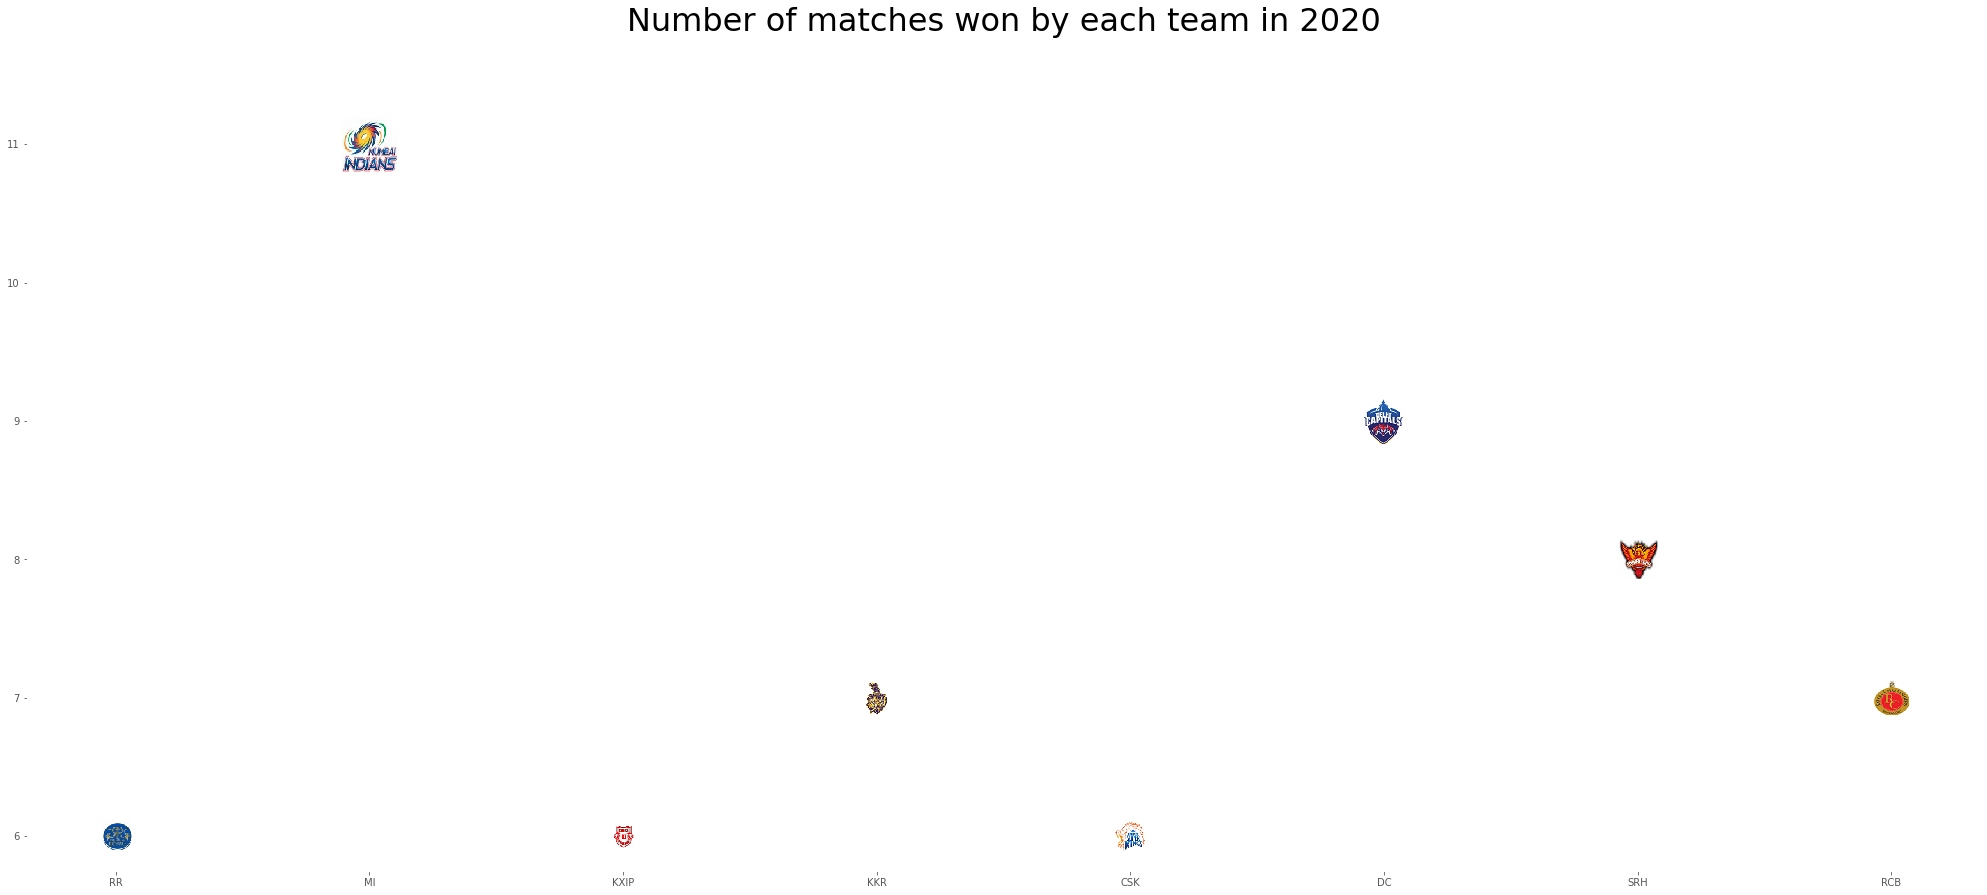

In [24]:
match_logos(2020)

<a id="hng"></a>
### Hierarchy based networkx graph design

The networkx basic graph is displayed based on hierarchy_pos(), where the root node is sent as parameter with graph and the graph is re-arranged based on the next parent value. It is a recursion based function where parent node is detected for every run and it is sent as input in the next iteration and so on constructing the hierarchy of the graph[1]. 

In [25]:
# This is code is taken from reference [1]
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G))) 
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

- Custom function get_finals() is used to get the match details and set them up in the graph based on the type of match. This function has four arguments graph, data, value gives the current type of match(semi-finals) and win gives us the next match type(finals). 

In [26]:
def get_finals(g,matches,value,win=''):
    matchs = matches.loc[matches['description'].str.contains(value)]
    ht = np.array(matchs['home_team'])[0]+str(' '+value)
    at = np.array(matchs['away_team'])[0]+str(' '+value)
    win = np.array(matchs['winner'])[0]+str(' '+win)
    g.add_node(win)
    g.add_node(ht)
    g.add_node(at)
    g.add_edges_from([(win,ht),(win,at)])
    return win

- A networkx graph is build by calling the get_finals functions from finals to elimination round and for year 2008, 2009, 2010 IPL match were conducted differently and hence for those year type of matchs were different. After obtaining a basic graph structure, this graph is sent as an input to hierarchy function and labels are mention seperately. Here, egdes and nodes are drown seperately.

In [27]:
def tree_matchs(year):
    T = nx.Graph()
    matches1 = matches.loc[matches['season']==year]
    win = get_finals(T, matches1,'Final')
    get_finals(T,matches1,'Qualifier 2','Final')
    get_finals(T,matches1,'Qualifier 1','Final')
    win = get_finals(T, matches1,'Final')
    if year == 2010 or year ==2009 or year == 2008:
        get_finals(T,matches1,'Qualifier 2','Final')
        get_finals(T,matches1,'Qualifier 1','Final')
    else:
        get_finals(T,matches1,'Qualifier 2','Final')
        get_finals(T,matches1,'Eli','Qualifier 2')
        get_finals(T,matches1,'Qualifier 1','Final')
    labels = {}    
    for node in T.nodes():
            labels[node] = node

    plt.figure(figsize=(20, 8))
    pos = hierarchy_pos(T,win)
    nx.draw(T, pos=pos, with_labels=False,node_color='white', node_size=5000)
    nx.draw_networkx_labels(T,pos,labels,font_size=18,font_color='#411673')
    plt.title("Brief Overview of Matches in "+str(year)+"\n\n",fontsize=30)


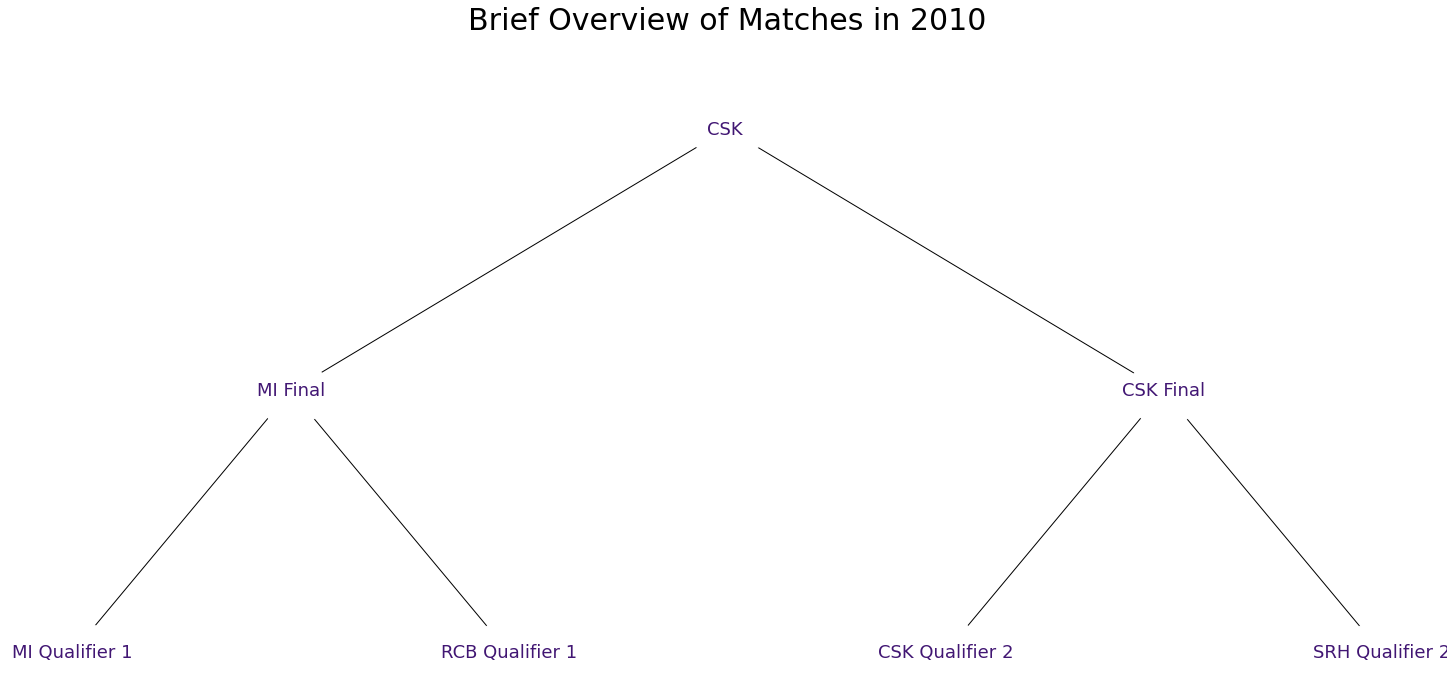

In [28]:
tree_matchs(2010)

<a id="dv"></a>
# Data Visualization 

The color codes are based on the batting(orange color) and bowling(purple color) team, these color are decided based on the famous titles "orange cap" for power best batsmen and "purple cap" for best bowler. 

### These are the graphs for bowling teams
- This visualization displayes the best bowlers in a team based on the lowest economy rate which is calulated based on the sum of economy rate for each match. 

In [29]:
def best_bowlers(team):
    bowling1 = bowling.loc[bowling['bowling_team']==team]
    bowling1 = bowling1.astype({"economyRate":np.float16})
    bowling3 = pd.DataFrame(bowling1.groupby(['fullName'])['economyRate'].sum().reset_index())
    bowling3 = bowling3.sort_values(by='economyRate', ascending = True).iloc[:15]
    plt.rcParams['ytick.labelsize']=10
    plt.rcParams['xtick.labelsize']=10
    sns.set_style("whitegrid")
    g = sns.catplot(x="economyRate", y="fullName", data=bowling3, kind="point", palette="Purples_r")
    g.set(ylabel='Bowlers',xlabel='Economy Rate',title='Best Bowlers in '+team+"\n\n")
    return g

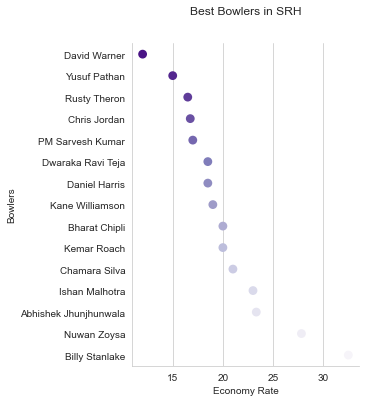

In [30]:
best_bowlers('SRH')

- This violinplot display the sixes or four conceded by a bowler for every wide ball through the match in a particular team.

<AxesSubplot:xlabel='wides', ylabel='foursConceded'>

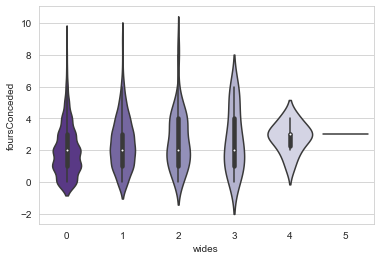

In [32]:
bowling1 = bowling.loc[bowling['bowling_team']=='SRH']
plt.rcParams['ytick.labelsize']=10
plt.rcParams['xtick.labelsize']=10
sns.violinplot(y="foursConceded", x="wides", data=bowling1, orient="v", height=5,aspect=2, palette="Purples_r")

<AxesSubplot:xlabel='wides', ylabel='sixesConceded'>

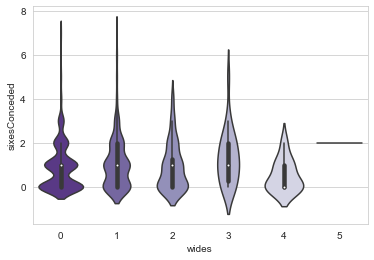

In [33]:
plt.rcParams['ytick.labelsize']=10
plt.rcParams['xtick.labelsize']=10
sns.violinplot(y="sixesConceded", x="wides", data=bowling1, orient="v", height=5,aspect=2, palette="Purples_r")

- This plot display the bar graph for purple cap, that is, the bowler with maximum wickets through out all the matches for a particular team. 

In [34]:
def wickets(team):
    bowling1 = bowling.loc[bowling['bowling_team']==team]
    bowling2 = pd.DataFrame(bowling1.groupby(['fullName'])['wickets'].sum().reset_index())
    bowling2 = bowling2.sort_values(by = 'wickets', ascending = False).iloc[:10] 
    plt.rcParams['ytick.labelsize']=10
    plt.rcParams['xtick.labelsize']=10
    g = sns.catplot(x='wickets',y='fullName',kind = 'bar',data=bowling2, palette="Purples_r")
    g.set(ylabel ="Bowlers", xlabel = "Total Number of Wickets",title='Purple Caps in '+team+'\n')
    return g

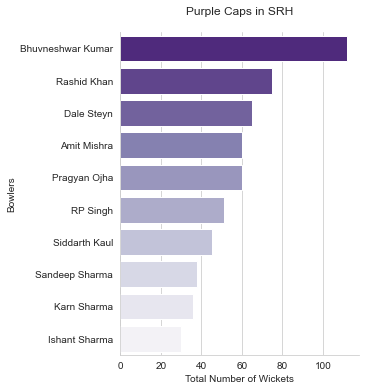

In [35]:
wickets('SRH')

- This graph depicts the histplot for number of conceded balls for each dots and maidens for all the matchs played by a particular team.

<AxesSubplot:xlabel='dots', ylabel='conceded'>

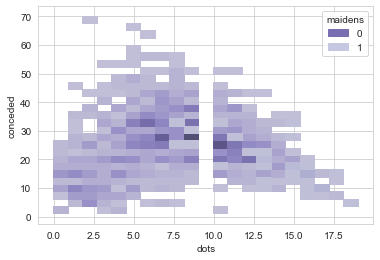

In [36]:
plt.rcParams['ytick.labelsize']=10
plt.rcParams['xtick.labelsize']=10
sns.histplot(x="dots", y="conceded", data=bowling1,hue="maidens", palette='Purples_r')

- The kdeplot describes the number of noballs for each dots and identifies it based on the captain of team, this graph is displyed for all the matches played by a particular team.

<AxesSubplot:xlabel='dots', ylabel='noballs'>

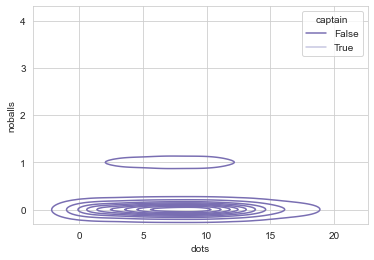

In [37]:
plt.rcParams['ytick.labelsize']=10
plt.rcParams['xtick.labelsize']=10
sns.kdeplot(x="dots", y="noballs", data=bowling1, hue="captain", palette='Purples_r')

### The graphs for batting teams

1. This graph visualizes the power hitters of the team, that is, the batsmen with maximum number of runs through all the matches played for a particular team.

<AxesSubplot:xlabel='runs', ylabel='fullName'>

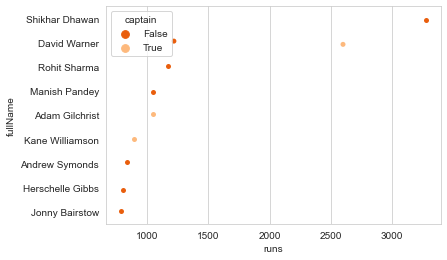

In [38]:
batting1 = batting.loc[batting['current_innings']=='SRH']
batting2 = pd.DataFrame(batting1.groupby(['fullName','captain'])['runs'].sum().reset_index())
batting2 = batting2.sort_values(by = 'runs', ascending = False).iloc[:10] 
sns.set_style("whitegrid")
plt.rcParams['ytick.labelsize']=10
plt.rcParams['xtick.labelsize']=10
sns.stripplot(y='fullName',x='runs',hue="captain",palette="Oranges_r",data=batting2)

- The swarmplot depicts the number of fours hit by different batsmen for the ball faced in all the matches played by a team. 

<AxesSubplot:xlabel='fours', ylabel='ballsFaced'>

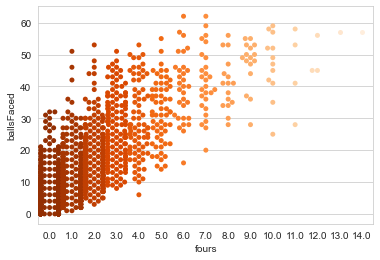

In [39]:
sns.set_style("whitegrid")
plt.rcParams['ytick.labelsize']=10
plt.rcParams['xtick.labelsize']=10
sns.swarmplot(x='fours',y='ballsFaced',data=batting1,palette="Oranges_r")

- The boxplot depicts the number of sixes hit by different batsmen for the ball faced in all the matches played by a team.

<AxesSubplot:xlabel='sixes', ylabel='ballsFaced'>

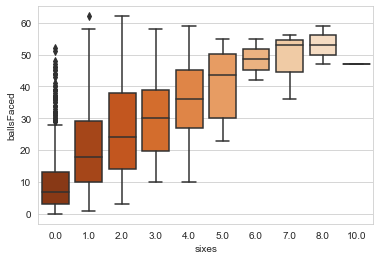

In [40]:
sns.set_style("whitegrid")
plt.rcParams['ytick.labelsize']=10
plt.rcParams['xtick.labelsize']=10
sns.boxplot(x='sixes',y='ballsFaced',data=batting1,palette="Oranges_r")

- The regplot describes the runs made by each batsmen to the running over rate for all the matches played by a team.

<AxesSubplot:xlabel='runs', ylabel='runningOver'>

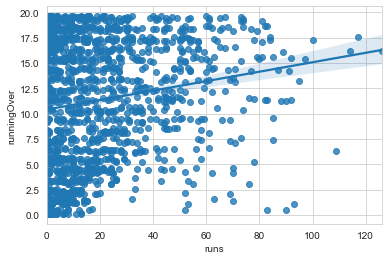

In [41]:
plt.rcParams['ytick.labelsize']=10
plt.rcParams['xtick.labelsize']=10
sns.regplot(x="runs",y="runningOver",data=batting1)

- This dats is matches data used to describe the boundaries made by a team when it played as home team and away team.

<AxesSubplot:xlabel='home_boundaries', ylabel='away_boundaries'>

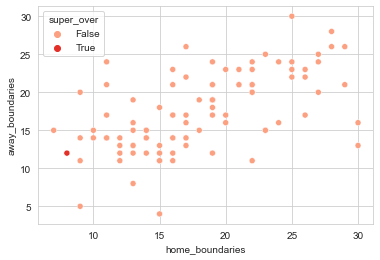

In [42]:
matchesa = matches.loc[matches['winner']=='SRH']
sns.set_style("whitegrid")
plt.rcParams['ytick.labelsize']=10
plt.rcParams['xtick.labelsize']=10
sns.scatterplot(x="home_boundaries",y="away_boundaries",hue="super_over",palette="Reds",data=matchesa)

<a id="dash"></a>
## Dashboard 

All the graphs are combined together into a funtion which created a figure and these graphs are fitted into the subplot of that figure and the values of each figure keeps changing dynamically based in the dropdown values declared in the next cell. Here, the data is read from excel and all the cleaning processes is followed.
1. There are about two columns and 8 rows declared for the figure declared below in the function create_main() which maintains 14 axes.
2. Here, only axes-level plots are used as the dashboard arrangement restricts the number of figures and hence only one figure can be display that is why faced grid plots are avoided.
3. This dashboard can take up to 1-2 mins to load the data when a drop down value is change as it needs to analyse the data and build a graph.
4. This dashboard can be displayed in four forms 
    1. Sample inline dashboard
    2. Sample HTML inline dashboard
    3. HTML dashboard in a localhost
    4. Save this dashboard to a html file

In [43]:
import matplotlib.gridspec as gridspec

def create_main(team, seasons):
    batting = pd.read_csv("data/all_season_batting_card.csv")
    bowling = pd.read_csv("data/all_season_bowling_card.csv")
    matches = pd.read_csv("data/all_season_summary.csv")
    matches = matches.bfill().ffill()
    batting = batting.bfill().ffill()
    bowling = bowling.bfill().ffill()
    batting['runningOver']=batting['runningOver'].replace(to_replace = np.nan,value = 0)
    batting['strikeRate'] = batting['strikeRate'].replace('-','0.0')
    batting.strikeRate = batting.strikeRate.astype(float)
    bowling['economyRate'] = bowling['economyRate'].replace('-','0.0')
    matches['description'] = matches.description.str.replace(r'\(.*','')
    matches['description'] = matches.description.str.replace(r'[Mm].*','')
    matches['description'] = matches.description.str.replace('1st Se','Qualifier 1')
    matches['description'] = matches.description.str.replace('2nd Se','Qualifier 2')
    matches['description'] = matches.description.str.replace('2nd Qualifying','Qualifier 2')
    matches['description'] = matches.description.str.replace('1st Qualifying','Qualifier 1')

    with plt.style.context(("ggplot")):
        fig = plt.figure(figsize=(20,30))
        specs = gridspec.GridSpec(ncols=2, nrows=8) 

        ax1 = fig.add_subplot(specs[0, :]) 
        ax2 = fig.add_subplot(specs[1, :]) 
        ax3 = fig.add_subplot(specs[2, 0]) 
        ax4 = fig.add_subplot(specs[2, 1]) 
        ax5 = fig.add_subplot(specs[3, 0])
        ax6 = fig.add_subplot(specs[3, 1])
        ax7 = fig.add_subplot(specs[4, 0])
        ax8 = fig.add_subplot(specs[4, 1])
        ax9 = fig.add_subplot(specs[5, 0])
        ax10 = fig.add_subplot(specs[5, 1])
        ax11 = fig.add_subplot(specs[6, 0])
        ax12 = fig.add_subplot(specs[6, 1])
        ax13 = fig.add_subplot(specs[7, 0])
        ax14 = fig.add_subplot(specs[7, 1])
        
        ##first plot 
        match = matches2.loc[matches2['season']==int(seasons)]
        plt.rcParams['ytick.labelsize']=30
        plt.rcParams['xtick.labelsize']=30
        ax1.scatter(match['teams'],match['wins']) 
        for x0, y0, path in zip(match['teams'], match['wins'], match['logos']):
            ab = AnnotationBbox(getImage("team_logo/"+path,y0), (x0, y0), frameon=False)
            ax1.add_artist(ab)
        ax1.set_facecolor("white")
        ax1.autoscale()
        ax1.set_title("Number of matches won by each team in "+str(seasons)+"\n\n",fontsize=14)
        
        ##second plot
        T = nx.Graph()
        matches1 = matches.loc[matches['season']==int(seasons)]
        win = get_finals(T, matches1,'Final')
        get_finals(T,matches1,'Qualifier 2','Final')
        get_finals(T,matches1,'Qualifier 1','Final')
        win = get_finals(T, matches1,'Final')
        if year == 2010 or year ==2009 or year == 2008:
            get_finals(T,matches1,'Qualifier 2','Final')
            get_finals(T,matches1,'Qualifier 1','Final')
        else:
            get_finals(T,matches1,'Qualifier 2','Final')
            get_finals(T,matches1,'Eli','Qualifier 2')
            get_finals(T,matches1,'Qualifier 1','Final')
        labels = {}    
        for node in T.nodes():
                labels[node] = node
        pos = hierarchy_pos(T,win)
        nx.draw(T, pos=pos, with_labels=False,node_color='white', node_size=5000,ax=ax2)
        nx.draw_networkx_labels(T,pos,labels,font_size=14,font_color='#411673',ax=ax2)
        ax2.set_title("Brief Overview of Matches in "+str(seasons)+"\n\n",fontsize=14)
        
        ##third_plot
        bowling1 = bowling.loc[bowling['bowling_team']==team]
        bowling2 = pd.DataFrame(bowling1.groupby(['fullName'])['wickets'].sum().reset_index())
        bowling2 = bowling2.sort_values(by = 'wickets', ascending = False).iloc[:10] 
        plt.rcParams['ytick.labelsize']=10
        plt.rcParams['xtick.labelsize']=10
        sns.set_style("whitegrid")
        sns.barplot(x='wickets',y='fullName',data=bowling2,palette = "Purples_r",ax=ax3)
        ax3.set(ylabel ="Bowlers", xlabel = "Total Number of Wickets",title='Purple Caps in '+team+'\n')
    
        ##forth_plot
        bowling1 = bowling.loc[bowling['bowling_team']==team]
        bowling1 = bowling1.astype({"economyRate":np.float16})
        bowling3 = pd.DataFrame(bowling1.groupby(['fullName','captain'])['economyRate'].sum().reset_index())
        bowling3 = bowling3.sort_values(by='economyRate', ascending = True).iloc[:10]
        plt.rcParams['ytick.labelsize']=9
        plt.rcParams['xtick.labelsize']=9
        sns.set_style("whitegrid")
        sns.pointplot(x="economyRate", y="fullName", data=bowling3,palette = "Purples_r",ax=ax4)
        ax4.set(ylabel='Bowlers',xlabel='Economy Rate',title="Best Bowlers in "+  team +" \n\n")
        
        ##5 plot
        c1 = bowling['bowling_team'] == team
        bowling1 = bowling.loc[c1]
        plt.rcParams['ytick.labelsize']=10
        plt.rcParams['xtick.labelsize']=10
        g3=sns.histplot(x="dots", y="conceded", data=bowling1,hue="maidens", palette='Purples_r',ax=ax5)
        ax5.set_title("The statistic of dots and conceded in "+team)
        
        ##6th plot 
        bowling6 = bowling.loc[c1]
        plt.rcParams['ytick.labelsize']=10
        plt.rcParams['xtick.labelsize']=10
        g3=sns.kdeplot(x="dots", y="noballs", data=bowling6, hue="captain", palette='Purples_r',ax=ax6)
        ax6.set(title="Missed balls and their dots through all matches in "+team)
        
        ##7th plot
        bowling7 = bowling.loc[bowling['bowling_team']==team]
        sns.set_style("whitegrid")
        plt.rcParams['ytick.labelsize']=10
        plt.rcParams['xtick.labelsize']=10
        g2 = sns.violinplot(y="foursConceded", x="wides",
                    data=bowling7,
                    orient="v", height=5,aspect=2, palette="Purples_r",
                    ax=ax7)
        ax7.set(title="Fours Conceded through all IPL matches for "+team)
        
        ##8th plot
        sns.set_style("whitegrid")
        plt.rcParams['ytick.labelsize']=10
        plt.rcParams['xtick.labelsize']=10
        g2 = sns.violinplot(y="sixesConceded", x="wides",
                    data=bowling7,
                    orient="v", height=5,aspect=2, palette="Purples_r",
                    ax=ax8)
        ax8.set(title="Sixes Conceded through all IPL matches for "+team)
        
        ##9th plot
        batting1 = batting.loc[batting['current_innings']==team]
        batting2 = pd.DataFrame(batting1.groupby(['fullName','captain'])['runs'].sum().reset_index())
        batting2 = batting2.sort_values(by = 'runs', ascending = False).iloc[:10] 
        sns.set_style("whitegrid")
        plt.rcParams['ytick.labelsize']=10
        plt.rcParams['xtick.labelsize']=10
        g3 = sns.stripplot(y='fullName',x='runs',hue="captain",palette="Oranges_r",data=batting2,ax=ax9)
        ax9.set(title="Orange Caps in "+team+"\n\n")  
        
        ##10th plot 
        batting1['strikeRate'] = batting1['strikeRate']/100 
        batting2 = pd.DataFrame(batting1.groupby(['fullName'])['strikeRate'].sum().reset_index())
        batting2 = batting2.sort_values(by = 'strikeRate', ascending = False).iloc[:10] 
        sns.set_style("whitegrid")
        plt.rcParams['ytick.labelsize']=10
        plt.rcParams['xtick.labelsize']=10
        sns.barplot(x='strikeRate',y='fullName',data=batting2,palette="Oranges_r", ax=ax10)
        ax10.set(title="Power Hitter in "+team+"\n\n")
        
        ##11th plot
        sns.set_style("whitegrid")
        plt.rcParams['ytick.labelsize']=10
        plt.rcParams['xtick.labelsize']=10
        sns.swarmplot(x='fours',y='ballsFaced',data=batting1,palette="Oranges_r", ax=ax11)
        ax11.set(title="Number of fours in "+team+"\n\n")
        
        ##12th plot
        sns.set_style("whitegrid")
        plt.rcParams['ytick.labelsize']=10
        plt.rcParams['xtick.labelsize']=10
        sns.boxplot(x='sixes',y='ballsFaced',data=batting1,palette="Oranges_r", ax=ax12)
        ax12.set(title="Number of sixes in "+team+"\n\n")
        
        ##13th plot
        sns.set_style("whitegrid")
        plt.rcParams['ytick.labelsize']=10
        plt.rcParams['xtick.labelsize']=10
        sns.regplot(x="runs",y="runningOver",data=batting1,ax=ax13)
        ax13.set(title="Run over / runs statistics for each "+team)
        
        ##14th plot
        matchesa = matches.loc[matches['winner']==team]
        sns.set_style("whitegrid")
        plt.rcParams['ytick.labelsize']=10
        plt.rcParams['xtick.labelsize']=10
        sns.scatterplot(x="home_boundaries",y="away_boundaries",hue="super_over",palette="Reds",data=matchesa,ax=ax14)
        ax14.set(title="boundary statistics for each winning "+team)
        
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)
        plt.close(fig)
        return fig

In [44]:
season = []
for s in matches['season'].unique():
    season.append(str(s))

<a id="dash1"></a>
## Dashboard Type1 (Inline)

The panel library is used to build a dashboard and dictionary of dropdown values are declared which much be named same as the arguments in the function create_main(). The interaction function is call with function and the dropdown values as parameters[4].

Column
    [0] Column
        [0] Select(name='team', options=['CSK', 'DC', ...], value='CSK')
        [1] Select(name='seasons', options=['2020', '2019', ...], value='2020')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00006')
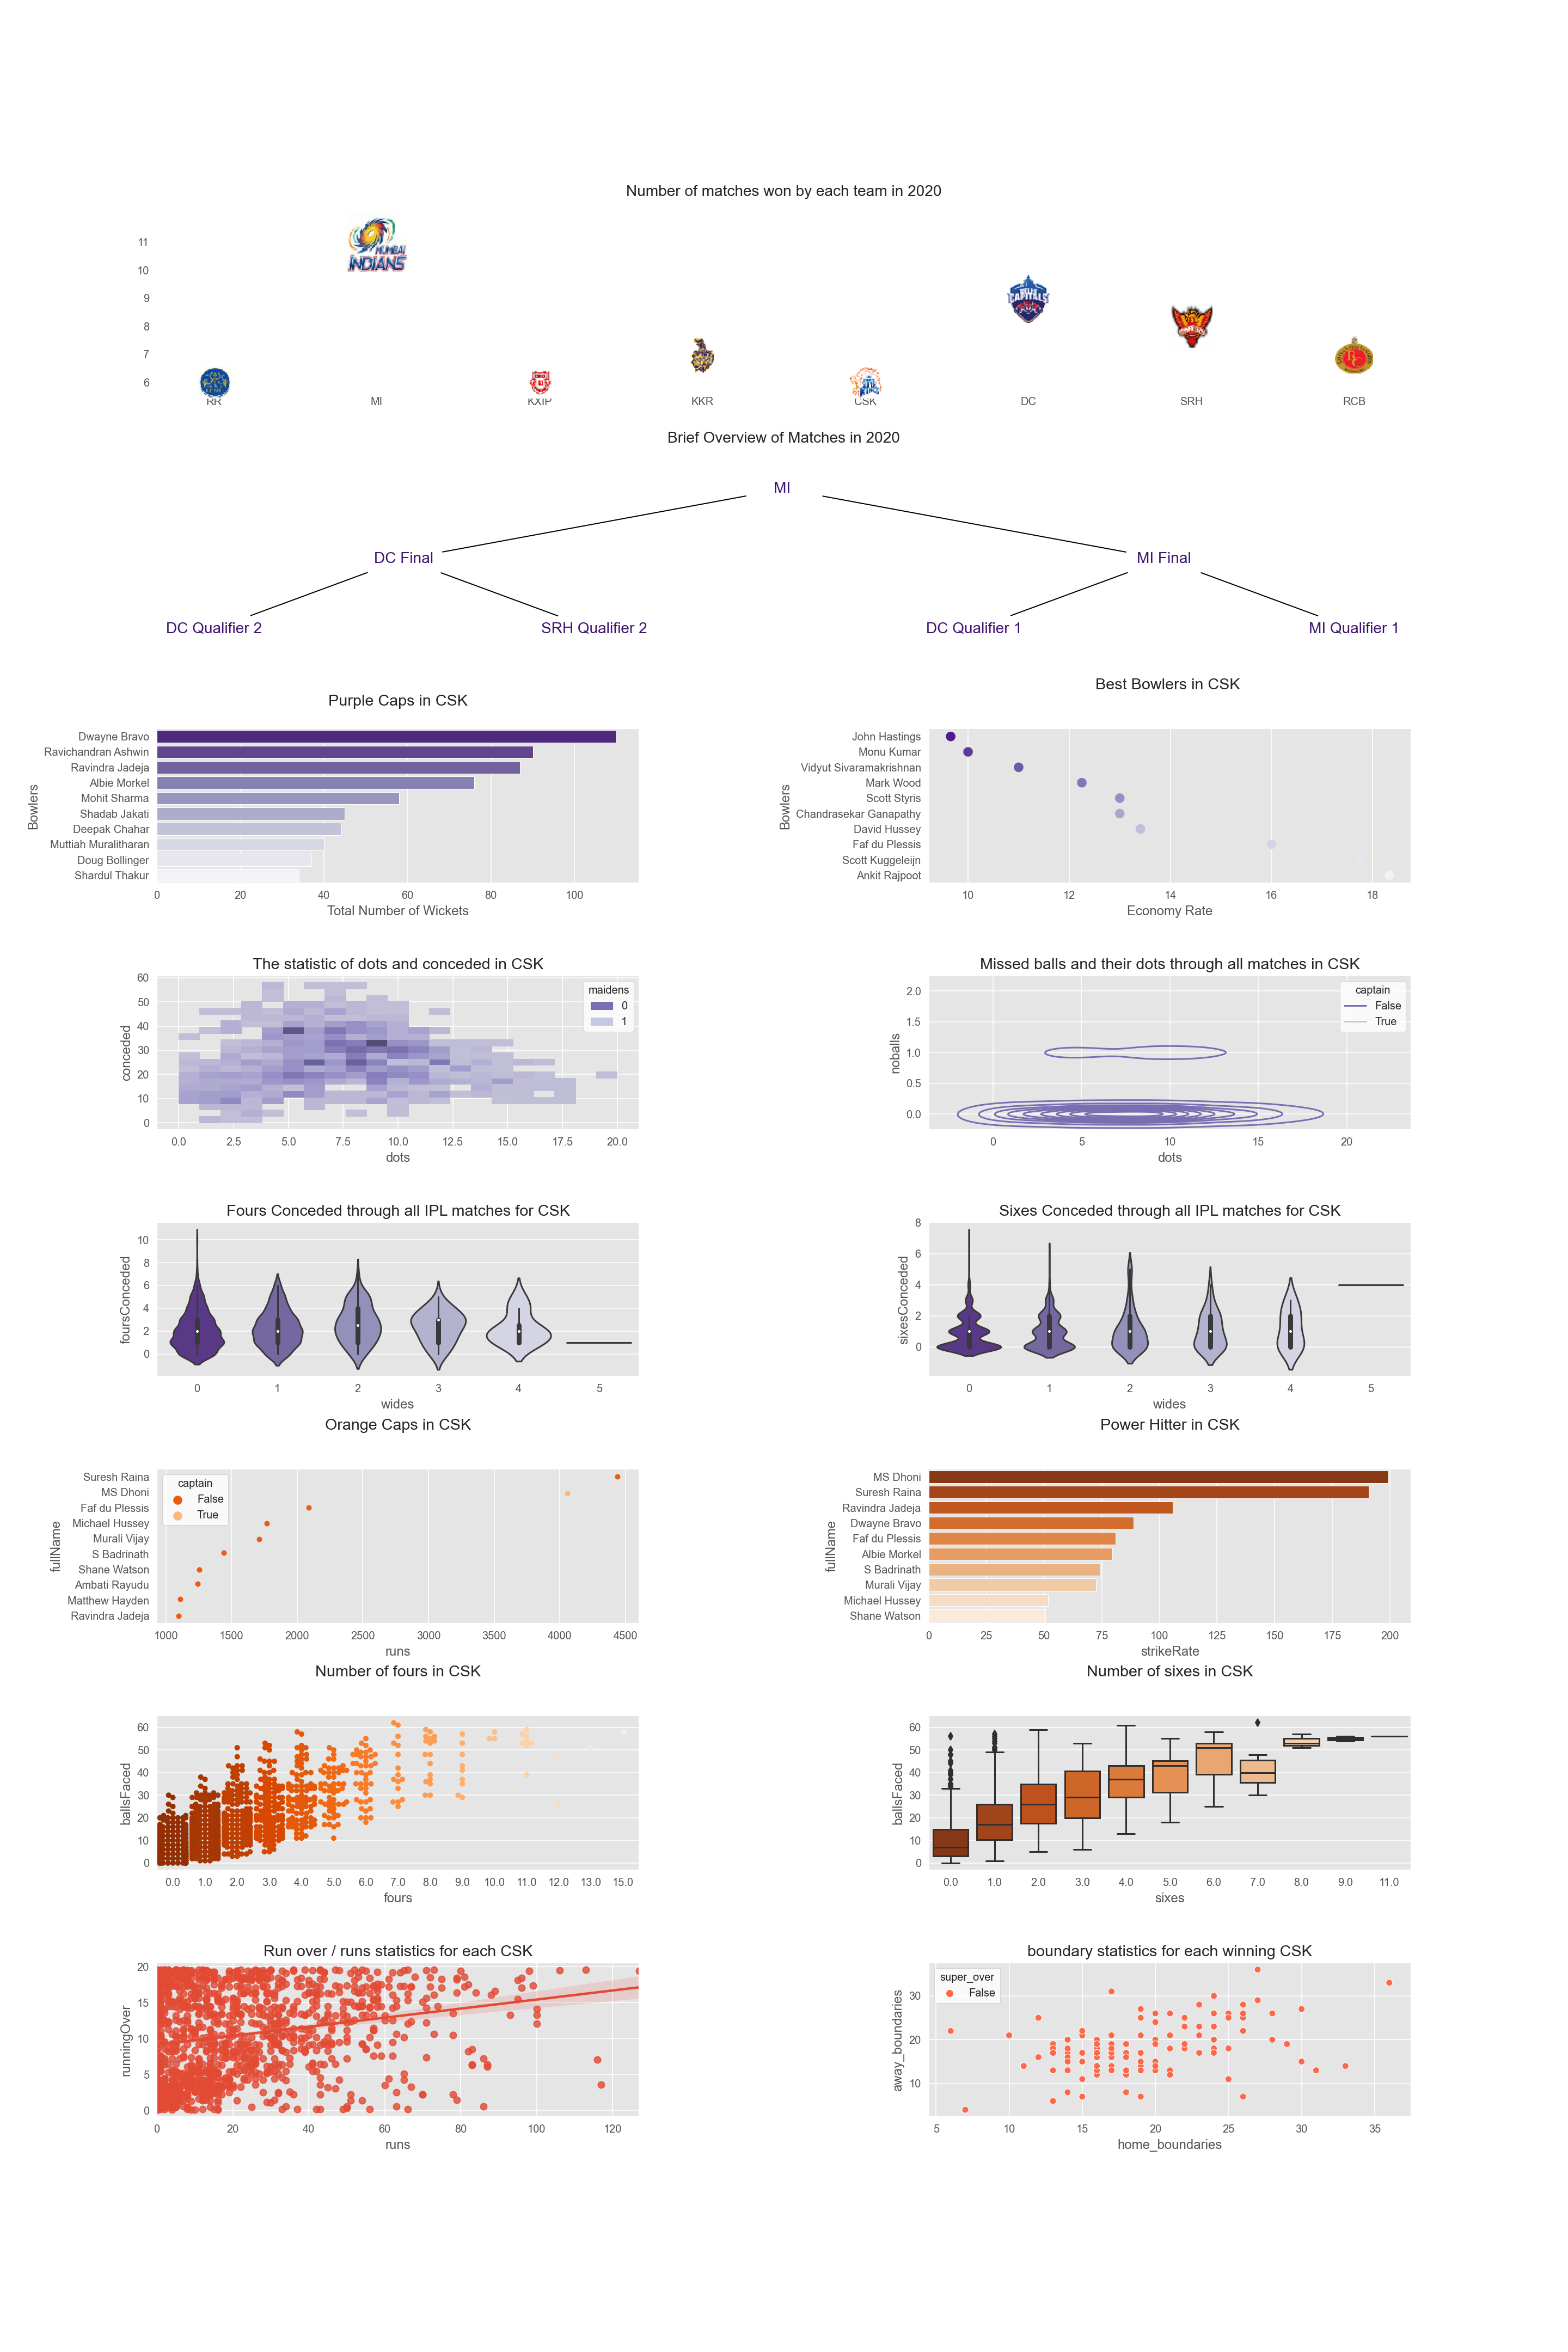

In [45]:
import panel as pn
pn.extension()

kw = dict(team = matches['winner'].unique(),
          seasons = season)


dash1 = pn.interact(create_main, **kw)
dash1

<a id="dash2"></a>
## Dashboard Type2(Include HTML)

This dashboard include different types of HTML elements, here, select and header are used. Heading1 and Heading describes about the each graph and a function create_dashI is implemented which depends on the above 2 dropdown values. And a bootstrap elements are used to arrange these graphs and dropdown in a page. The results is shown below.

Column
    [0] StaticText(align='center', value='<h1>Indian Premier L...)
    [1] StaticText(align='center', value='<p><b>Graph1(image scatte...)
    [2] Row(align='center')
        [0] Select(name='IPL Team Names', options=['CSK', 'DC', ...], value='CSK')
        [1] Select(name='IPL Seasons', options=['2020', '2019', ...], value='2020')
    [3] Row
        [0] ParamFunction(function)
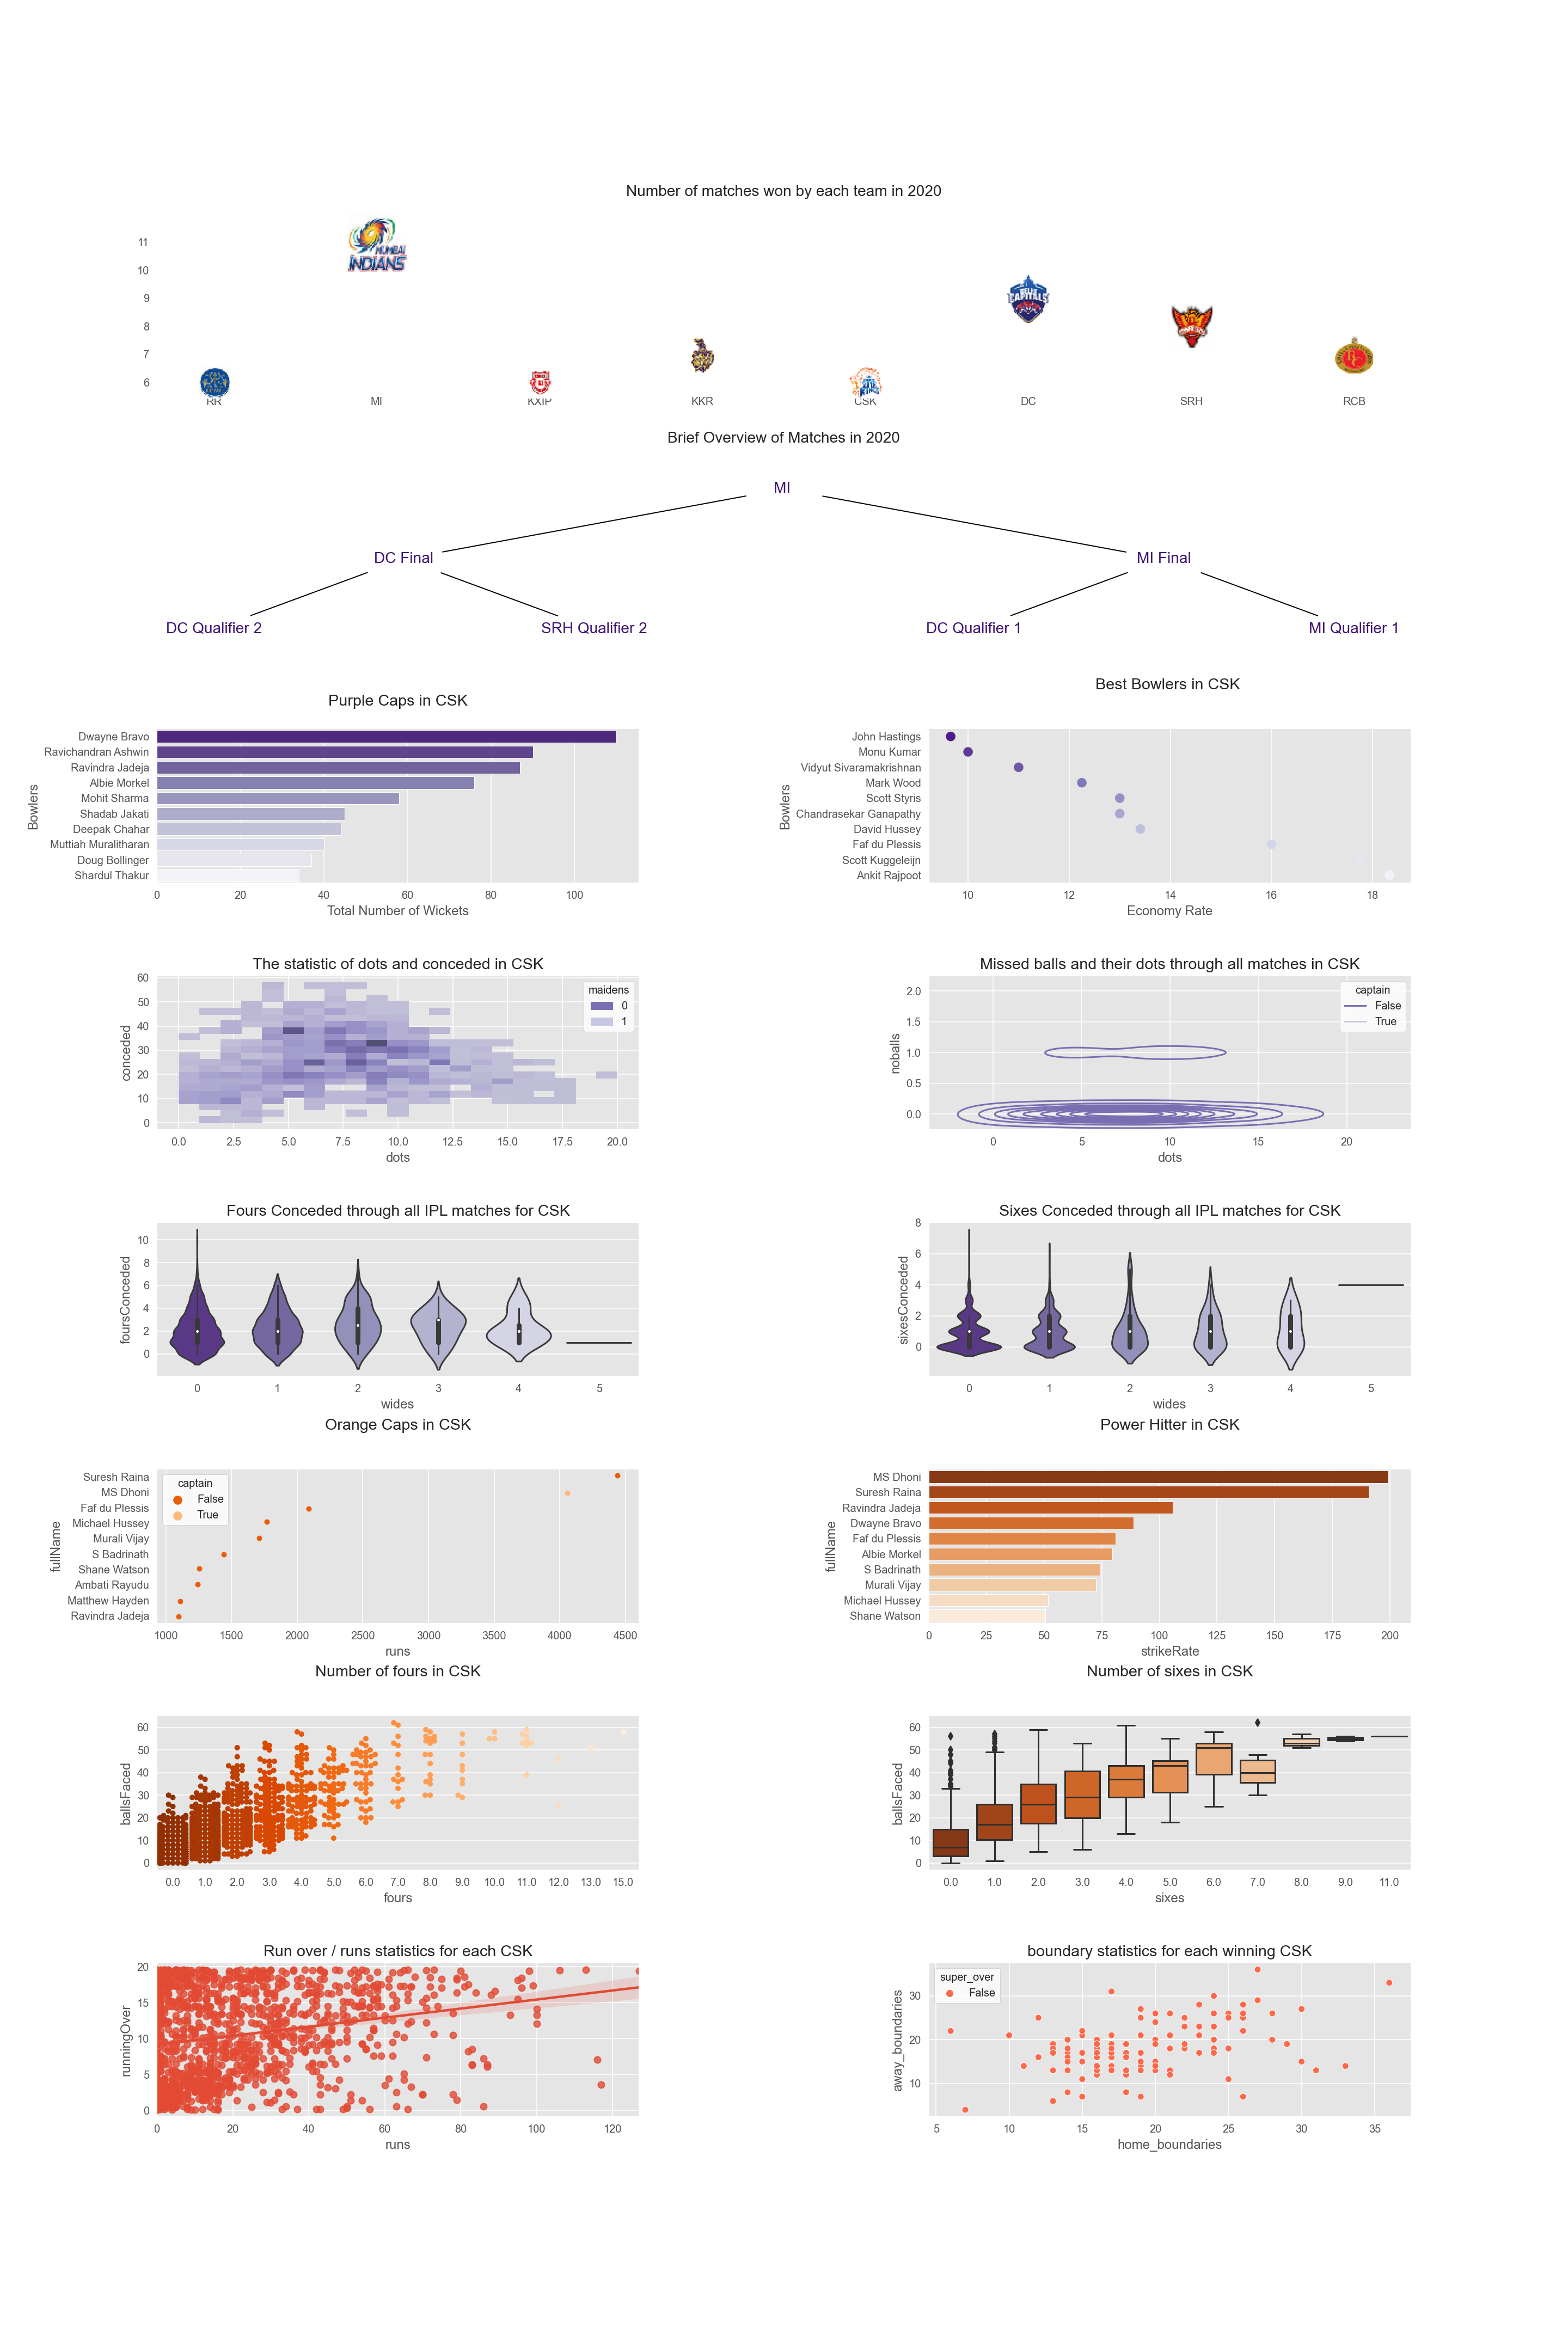

In [46]:
p1 = widget.Select(options=list(matches['winner'].unique()), name="IPL Team Names")
p2 = widget.Select(options=list(season), name="IPL Seasons")

@pn.depends(p1.param.value, p2.param.value)
def create_dashI(p1,p2):
    return create_main(p1,p2)

heading1 = "<h1>Indian Premier League Team Analysis</h1>"
heading ="""<p><b>Graph1(image scatterplot)</b> depicts the modified design of scatter plot where dots are replaced by 
images or logos of teams, This graph illustrates the matches won by each team in a season and seasons 
are selected from dropdown.</p>"""
heading +="""<p><b>Graph2(networkx tree)</b> depicts the tree implemented from networkx, it gives a brief match hierarchy for 
each season based on the value selected from season dropdown.</p>"""
heading +="""
<p><b>Graph3(horizontal barplot)</b> illustrates the maximum number of wickets made by player of each team based on teams dropdown.</p>
"""
heading +="""
<p><b>Graph4(dotplot)</b> depicts the economy rate of each player based on which the best bowler is 
decided for each team based on the value of team drodown.</p>
"""
heading +="""
<p><b>Graph5(histplot)</b> shows the statistics of dots and conceded for 
each team based on team dropdown.</p>
"""
heading +="""
<p><b>Graph6(kdeplot)</b> illustrates the missed balls on dots throughout the matches
for each team based on the team dropdown</p>
"""
heading +="""
<p><b>Graph7(violinplot)</b> depicts the number of fours conceded by bowlers in
each team and changes based on team drop down values.</p>
"""
heading +="""
<p><b>Graph8(violinplot)</b> shows the number of sixes conceded by bowlers in
each team and changes based on team drop down values.</p>
"""
heading +="""
<p><b>Graph9(stripplot)</b> illustrated the orange caps as in the players who had made maximum 
number of runs through out the seasons.</p>
"""
heading +="""
<p><b>Graph10(barplot)</b> depicts the power hitter in each team, power hitter is the one with good strike rate
.</p>
"""
heading +="""
<p><b>Graph11(swarmplot)</b> shows the number of fours hit by each team through all the matches.</p>
"""
heading +="""
<p><b>Graph12(boxplot)</b> illustrates the number of sixes hit by each team throughout the IPL.</p>
"""
heading +="""
<p><b>Graph13(replot)</b> gives an overview of running over and runs statictics throughout the matches.</p>
"""
heading +="""
<p><b>Graph14(scatterplot)</b> provides statistical view on boundaries made by each team.</p>
"""


text1 = widget.StaticText(value=heading1,align="center")
text2 = widget.StaticText(value=heading,align="center")
dashboard_app = pn.Column(
    text1,
    text2,
    pn.Row(p1,p2,align="center"),
    pn.Row(create_dashI)
)

dashboard_app

<a id="dash3"></a>
## Dashboard Type3(Localhost)

The same dashboard element is called by a function show which assigns a port to the app and display it on website, This approach might launch a plain application some times, that is why above two inline files are displayed and the output for this file is present in the folder.

In [47]:
dashboard_app.show()

Launching server at http://localhost:64026


## Dashboard Type4(Save to html)
**HTML interaction dont work, .html is for reference and not to test the**

In [ ]:
dashboard.save("grad_project.html")

## Tools used

1. Matplotlib (To build subplots and custom plots) 
2. Seaborn (To design all the graphs)
3. Pandas (To clean and process the data)
4. Panel (Panel and its widgets are used to build differn=ent types of interactive dashboards for matplotlib)

## Challenges

1. The first challenge was to create a custom scatter plot, and with interactivity and resizing the images for a change in drop down values.
2. To Build the dashboard based on seaborn and matplotlib, which has only one source to create and was pretty tough[3].
3. Only axes graphs were allowed with in the dashboard as it display atmost one figure at a time. Hence, all the graphs are combined into a figure and displayed due to which all faced grid plots are ignored.

<a id="r"></a>
## References:

1. https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3
2. https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
3. https://panel.holoviz.org/reference/widgets/
4. https://coderzcolumn.com/tutorials/data-science/how-to-create-dashboard-using-python-matplotlib-panel